# Exercice 1
## Exploring medical and health data with Python and pandas

#### Marc Coca Moreno
#### Aymane El Hanbali 
#### Melania Prado Gutierrez

# Introduction

The following document aims to show the main results of the first practice of M14 - Bioinformatics.

The topic of the essay is about processing and analyzing health related data in order to produce a technical scientific report of the findings.

In our case, we choose as the principal dataset the count of weekly deaths registered in the geographical units of European Union. In order to analyze properly this dataset, we also need to use demographic data (population counts) and catalogues of the geographical european unit entities (NUTS).

All the data comes from [Eurostat](https://ec.europa.eu/eurostat) and can be accessed with the following links:

1. Weekly deaths by sex, age (by 5) and NUTS-3: https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/demo_r_mweek3.tsv.gz

2. Population by sex, age (by 5) and NUTS-3: https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/demo_r_pjangrp3.tsv.gz

3. NUTS 2021 catalogue: https://ec.europa.eu/eurostat/documents/345175/629341/NUTS2021.xlsx

## Starting point: 'raw_data' folder

The three main datasets mentioned above are the original ones and, in some cases, they contain more data than is needed. For this reason, we do some subsetting before in order to reduce the size of the files.

In particular, the weekly deaths dataset, that contains data from 2000 to 2022, is initially filtered just to keep a range interval from 2020 to 2021. The main structure and errors present in dataset are kept as they are in order to fix them along the essay.

Also, population data is filtered to match the same periode (2020-2021).

Finally, NUTS3 catalogue are imported as they ara and no transformation is requiered in this step.

This first integration can be reproduced with the 'create_raw_data.py' script.

Keep in mind that this essay assume that row_data folder and the three datasets exist. They are the starting point from now on.

## create_raw_data.py

The main procedures carried out in this script are the following:

    (1) The original data (deaths, population and NUTS3 catalogue) from Eurostat is fetched.
    (2) Column names are trimmed (whitespaces).
    (3) Deaths and population temporal range are equalized (same time periode).
    (4) Finally, data is exported as CSV in raw_data folder.

In [ ]:
from create_raw_data import fill_raw_data_folder

#fill_raw_data_folder()

# Question 1: import and describe your data

In the following sections, the used datasets are described.

## Context: data and references

As stated before, we play with 3 main datasets:
    (1) Weekly deaths in European Union by sex, age (5) and NUTS geographical entities.
    (2) Annual population in European Union by sex, age (5) and NUTS geographical entities.
    (3) NUTS catalogue.

All these datasets come from Eurostat database and can be described as following:

    (1) Count of deaths by different levels of aggregation.
    (2) Population count by different levels of aggregation.
    (3) Codes and labels of NUTS geographical entities.

For a more detailed explanation, visit the Eurostat descriptions of the data:

    (1) https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Weekly_death_statistics
    (2) https://ec.europa.eu/eurostat/cache/metadata/en/demo_r_gind3_esms.htm
    (3) https://sdi.eea.europa.eu/catalogue/srv9008075/api/records/60719905-dd2c-4c65-997b-4b9f25bc42d7

We only use a temporal subset of the data: from 2020 to 2021.

## Variables

Mainly, we are going to use all columns present on the datasets, we just ignore some variables of NUTS catalogue. As it comes from Eurostat, the structure of the datasets must be reshaped and fixed. In short, the structure is as follows:

    (1) Deaths:
        · "unit,sex,age,geo\time" (str) --> Collapsed var with a constat NR (National Region) value + sex + age group (by 5) and NUTS level.
        · The remaining columns (int) --> describe the year+week of the value (count of deaths) with the following format: "%YW%W". Format integer.

    (2) Population:
        · "sex,unit,age,geo\time" (str) --> Collapsed var with sex + constant NR + Age group + NUTS level
        · The remaining columns (int) --> describe the year of the population value.

    (3) NUTS3 catalogue:
        · Code (str) --> code of NUTS level. The lenght of the code depends on the level referenced: Country (2), NUTS-1 (3), NUTS-2 (4), NUTS-3 (5).
        · Country (str) --> country name of the NUTS code if NUTS level code is country; if not, the cell is blank.
        · NUTS level 1 (str) --> NUTS1 name of the NUTS code if NUTS level code is NUTS1; if not, the cell is blank.
        · NUTS level 2 (str) --> NUTS2 name of the NUTS code if NUTS level code is NUTS2; if not, the cell is blank.
        · NUTS level 3 (str) --> NUTS3 name of the NUTS code if NUTS level code is NUTS3; if not, the cell is blank.
        · The remaining columns (mixed) --> they are going to be ignored.

## How many rows there are?

In this case, the count NA rows is a bit tricky: deaths and population data has a symbol ":" when no data is present, so no NA will be identified.

For NUTS catalogue, all rows register at least 1 NA becouse their columns are mutually exclusive. For example, if code is about the Country, just the country name will be present and all the other features are kept in blank (NA).

Next the results are shown:

In [ ]:
from ex1 import get_row_count

deaths_n_rows: int = get_row_count("deaths_data.csv")
population_n_rows: int = get_row_count("population_data.csv")
nuts3_n_rows: int = get_row_count("nuts3_catalogue.csv")

print(f"Total rows of deaths dataset: {deaths_n_rows}")
print(f"Total rows of population dataset: {population_n_rows}")
print(f"Total rows of NUTS3 catalogue dataset: {nuts3_n_rows}") 

## Are there any NAs?

Identify NA values is a little tricky in these datasets: population and deaths data register a ":" symbol when empty; variables of NUTS catalogue data are mutually exclusive.

Thus, we will not find any NA value in deaths and population datasets. On the contrary, NUTS dataset present at least one NA per row.

In [ ]:
from ex1 import get_count_nas

deaths_n_na: int = get_count_nas("deaths_data.csv")
population_n_na: int = get_count_nas("population_data.csv")
nuts3_n_na: int = get_count_nas("nuts3_catalogue.csv")

print(f"Total rows with NA value of deaths dataset: {deaths_n_na}")
print(f"Total rows with NA value of population dataset: {population_n_na}")
print(f"Total rows with NA value of NUTS3 catalogue dataset: {nuts3_n_na}") 

## Top 5 rows of datasets

In [ ]:
from ex1 import print_top_rows

print_top_rows("deaths_data.csv")
print_top_rows("population_data.csv")
print_top_rows("nuts3_catalogue.csv")

# Question 2. Fix and clean datasets

In this section we are going to fix, clean and, basically, make our datasets "tidy". The results can be found in 'tidy_data' folder, where the previous data are reshaped properly, and 'clean_data', where tidy_data has been cleaned and prepared for further exercices.

 We are going to make the following transformations:

    (1) Deaths and population datasets:
        · Split the collapsed variable unit,sex,age,geo\time
        · We only keep NUTS 3 level: totals and upper level of aggregations are removed as we can recalculated with NUTS-3.
        · Reshape years columns to long format: column names are going to be placed in a variable call time and the values in a variable called deaths

    (2) NUTS Catalogue:
        · We only keep NUTS3 level.
        · Upper levels of aggregation are going to be places as columns.

In this way, we finally get three reshaped dataframes with the following variables:

    (1) deaths_reshaped:
        · sex (str)
        · age (str)
        · nuts (str): NUTS-3 level
        · year_week (str)
        · deaths (int)
        · is_provisional (bool)
        · year (int)
        · week (int)

    (2) population_reshaped:
        · sex
        · age
        · nuts: NUTS-3 level
        · year (int)
        · population (int)
        · is_provisional (bool)

    (3) nuts3_catalogue_reshaped:
        · nuts3_code (str): ID
        · nuts2_code (str)
        · nuts1_code (str)
        · country_code (str)
        · nuts3_label (str)
        · nuts2_label (str)
        · nuts1_label (str)
        · country_label (str)


## Is the dataset tidy? Justify your answer

No, any of the 3 datasets in 'raw_data' folder are tidy. Basically, for the deaths and population datasets we find the following problems:

    · The range of year-week columns are not really variables: in fact, they are values!
    · Some cells mix data with a 'p' character that means: provisionals. So, there are cells with more than one value.
    · There are redundancy between rows as multiple levels of aggregation of the same data are present. For example, the NUTS-2 level rows are just the correct aggregation of NUTS-3 level rows.

Also, for nuts3_catalogue we find the following:

    · Same redundancy between rows as described before
    · Not every cell corresponds with a data entry.

Also, there are mixed and incorrect value types.

## If not tidy, fix it!

The following code implements the 3 transformations:

In [ ]:
from ex2 import tidy_deaths_dataset, tidy_population_dataset, tidy_nuts_catalogue

tidy_deaths_dataset("deaths_data.csv", "deaths_tidy.csv")
tidy_population_dataset("population_data.csv", "population_tidy.csv")
tidy_nuts_catalogue("nuts3_catalogue.csv", "nuts3_tidy.csv")

# Question 3. Non Available values

First things first, yes, there are a lot of NaN values in deaths and population datasets. Also, there are 0 values. This fact is due to errors in the registration process (missing entities, age groups, etc.) and becouse, in fact, the entity has experienced a 0 value of the indicator.

Bellow, we describe the adopted aproach and the transformations applied to 'tidy_data' files. The results can be found in 'clean_data' folder.

## What to do? An aggressive aproach

We adopt an aggressive aproach and we decide to remove all NaN rows and non informative values, that is: we remove NaN rows and 0 count rows and we assume that if one region is not present in a certain week or time point, its indicator is in fact 0.

Next, we transform deaths_tidy.csv and population_tidy.csv datasets as described above. We leave as it is the nuts3_tidy.csv becouse the dataset is already clean and prepared to be used.

In [ ]:
from ex3 import remove_non_informative_rows, copy_file

remove_non_informative_rows("deaths_tidy.csv", "deaths_clean.csv", "deaths")
remove_non_informative_rows("population_tidy.csv", "population_clean.csv", "population")
copy_file("tidy_data/nuts3_tidy.csv", "clean_data/nuts3_clean.csv")

# Query that filters results.

## Show only some of the columns of the dataframe.

At this moment we already have clean files and the next step will be to read them and apply a filter.

Since we would like to have a table, all we need now is to read the files and select the values desired.

Our filter consists of an overview of the deaths, age, year and nuts, of our table, showing 10 values.



In [ ]:
from ex4 import show_selected_columns

show_selected_columns(input_file_name = 'deaths_clean.csv', selected_columns=['deaths', 'age', 'year', 'nuts'])


## Filter some of the files by one or more criteria.

To make the filter we are using a mask which is applied on the df.

The mask will replace the values to be only if the condition is true.

In this case the filter will show us only the age ranges 15-19 or 85-89.

In [ ]:
from ex4 import filter_rows


filter_rows(input_file_name= 'deaths_clean.csv')


# Query to create a ranking.

## That is to say, to sort the values in a column and display the first ones on the screen.

In this case we we would like to find out which are the cities with the highest weekly deaths.

To show this, we'll have to read the files, merges the different columns and querys the results sorting top 10.

This way we can relate the city name instead of the nuts3 nomenclature.

In [1]:
from ex5 import get_top_deaths_by_city

get_top_deaths_by_city('deaths_clean.csv', 'nuts3_clean.csv','nuts3_label')

,nuts3_label,deaths
95,Barcelona,50198.0
357,Madrid,49647.0
498,Roma,45230.0
384,Milano,33609.0
671,Área Metropolitana de Lisboa,33114.0
398,Napoli,31071.0
129,Bucureşti,29089.0
743,Београдска област,28678.0
575,Torino,28210.0
411,Nord,25275.0


## Display graphic 

To compare the data previously queried, we will create a graph. This function will display a ranking of weekly deaths by city.

For the display we use plot.bar taking by_column as X and Deaths on y.

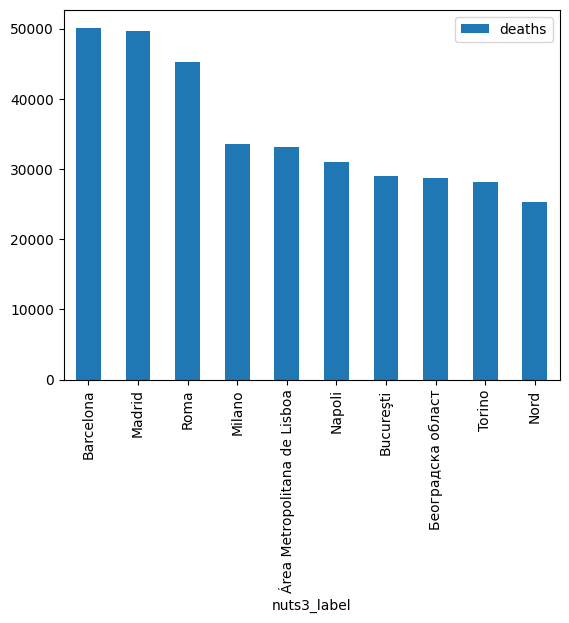

In [2]:
from ex5 import show_ranking_deaths_by_city

show_ranking_deaths_by_city('deaths_clean.csv', 'nuts3_clean.csv','nuts3_label')    


# Query that creates at least one calculated column.

That is to say, the query creates a new field depending on another field, or calculated from from other columns.

For this we'll read the files, merge to unite them, filter with a query and calculate the values.

The result is saved on the folder Results. If everything is correct, it will print a confirmation.

In [6]:
from ex6 import get_mortality_rate

get_mortality_rate("deaths_clean.csv", "population_clean.csv", "nuts3_clean.csv" )

# Exporting mortality_rate_by_region.csv ...
# Exported succesfully.


# Question 7) Query with grouped data by categorical field. 

## We assign a category based on each death rate range as follows: 

    - More than 12%o --> "Over average"

    - Up to 12%o and more than 9%o --> "Average"

    - Less than 9%o --> "Below average" 
    

Then, the graphs shows how many regions fall into each category.

In [ ]:
from ex7 import show_mortality_rates

show_mortality_rates("mortality_rate_by_region.csv", [0, 9, 12, 100], ["Below average", "Average", "Over average"])

# Question 8) Query with grouped data by date 

## Here the data existing in the 'date' column from a dataframe is used to show a lines chart comparing the evolution in time of the of the mortality rate among different countries defined in a list

In [ ]:
from ex8 import show_mortality_rates_by_week 

show_mortality_rates_by_week("deaths_clean.csv", "nuts3_clean.csv", "population_clean.csv", ["España", "France", "Portugal", "Italia", "Deutschland", "Suomi/Finland"])

# Question 9)

## Here the data from a csv file containing deaths numbers merged with the corresponding nuts region data existing in the nuts csv file is displayed

In [ ]:
from ex9 import merge_dataframes 

merge_dataframes("deaths_clean.csv", "nuts3_clean.csv")